# Comaparison of Matplotlib and Bokeh Libraries

To evaluate each libraries we will plot the following 7 most commonly used chart types:
1. Histogram
2. Vertical Bar & Horizontal Bar
3. Vertical Stacked Bar & Horizontal Stacked Bar
4. Line
5. Area & Area Stacked
6. Pie & Donut
7. Scatter & Scatter Bubble

## 0. Set up

##### Import Libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bokeh.io import output_notebook, show, output_file, export_png
from bokeh.plotting import figure
from math import pi # will use it for claculating angles when drawing pie charts in Bokeh
from bokeh.transform import cumsum # also to be used in Bokeh pie charts

In this case, we are in the Jupyter notebook, so we will call output_notebook() below. We only need to call this once, and all subsequent calls to show() will display inline in the notebook.

In [2]:
output_notebook()

Loading BokehJS ...

You can use below if you want to output Bokeh chart to an html file instead of showing it in your notebook

In [20]:
#output_file('test.html', mode=None, root_dir=None)

##### Import Data

In [3]:
df=pd.read_csv('F1_Winner_List.csv')
df

,Grand Prix,Date,Winner First Name,Winner Last Name,Winner Short Name,Car,Team,Laps,Time,Winner,Year
0,United States,11 Mar 1990,Ayrton,Senna,SEN,McLaren Honda,McLaren,72,1:52:32.829,Ayrton Senna,1990
1,Brazil,25 Mar 1990,Alain,Prost,PRO,Ferrari,Ferrari,71,1:37:21.258,Alain Prost,1990
2,San Marino,13 May 1990,Riccardo,Patrese,PAT,Williams Renault,Williams,61,1:30:55.478,Riccardo Patrese,1990
3,Monaco,27 May 1990,Ayrton,Senna,SEN,McLaren Honda,McLaren,78,1:52:46.982,Ayrton Senna,1990
4,Canada,10 Jun 1990,Ayrton,Senna,SEN,McLaren Honda,McLaren,70,1:42:56.400,Ayrton Senna,1990
...,...,...,...,...,...,...,...,...,...,...,...
529,Japan,13 Oct 2019,Valtteri,Bottas,BOT,Mercedes,Mercedes,52,1:21:46.755,Valtteri Bottas,2019
530,Mexico,27 Oct 2019,Lewis,Hamilton,HAM,Mercedes,Mercedes,71,1:36:48.904,Lewis Hamilton,2019
531,United States,03 Nov 2019,Valtteri,Bottas,BOT,Mercedes,Mercedes,56,1:33:55.653,Valtteri Bottas,2019
532,Brazil,17 Nov 2019,Max,Verstappen,VER,Red Bull Racing Honda,Red Bull Racing,71,1:33:14.678,Max Verstappen,2019


## 1. Histogram

To draw histograms we need a continuous variable. Let's use Laps field for that which will give us a view on the distibution of laps for a typical race. Note, race tracks vary in lengh. Since each race tends to cover similar distance, shorter race tracks have more laps in a race, while longer tracks have less laps in a race.

##### Matplotlib

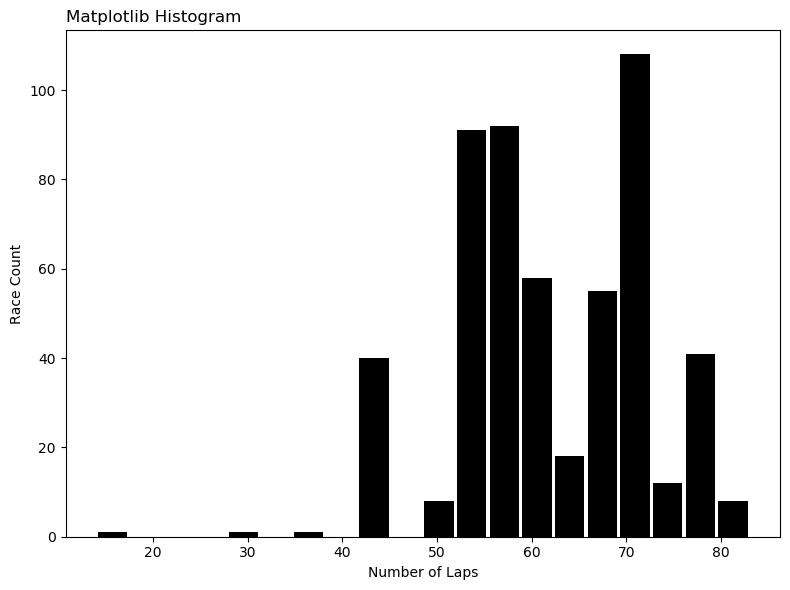

In [34]:
# Draw a chart
plt.figure(figsize=(8,6), dpi=100)

plt.title(label='Matplotlib Histogram', loc='left')
plt.xlabel('Number of Laps')
plt.ylabel('Race Count')

plt.hist(df['Laps'], bins=20, color='black', rwidth=0.9)

# plt.show()

# Automatically adjusts padding which works better when saving image to a file
plt.tight_layout()

plt.savefig('Art004_Python_plt_001.png')

##### Bokeh

There is no ready histogram function in Bokeh hence an extra step is required to produce it. We will need to use numpy for that.

In [25]:
# Use numpy to create bins
hist, edges = np.histogram(df['Laps'], bins=20)

# Draw a chart
p = figure(title='Bokeh Histogram', plot_width=800, plot_height=600,
           x_axis_label='Number of Laps', y_axis_label='Race Count')
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color='white', fill_color='black')

show(p)

# You can use export_png() to save you chart as a png image
#export_png(p, filename='Art004_Python_bk_001.png', width=1200, height=900)



## 2. Vertical Bar & Horizontal Bar

Bar charts are similar to histograms but they can also take categorical variables. For Bar charts we will use Winner which will show us how many races were won by each driver between 1990 and 2019

##### Aggregate data by Winner

In [77]:
# Create a dataframe with only two columns
df_bar=df.copy()
df_bar=df_bar.loc[:,['Winner', 'Grand Prix']]

# Group by Race winner
df_bar=df_bar.groupby(by='Winner', as_index=False).count()
df_bar=df_bar.rename(columns={'Grand Prix' : 'Total GP Win Count'})

# Create two dataframes one aorted in ascending order another in descending order
df_bar_desc=df_bar.sort_values(by='Total GP Win Count', ascending=False)
df_bar_asc=df_bar.sort_values(by='Total GP Win Count', ascending=True)

# Print resulting dataframes
#df_bar_asc
df_bar_desc

,Winner,Total GP Win Count
23,Michael Schumacher,91
20,Lewis Hamilton,84
34,Sebastian Vettel,53
8,Fernando Alonso,32
26,Nico Rosberg,23
3,Damon Hill,22
1,Ayrton Senna,21
19,Kimi Raikkonen,21
24,Mika Hakkinen,20
27,Nigel Mansell,16


##### Matplotlib

Vertical

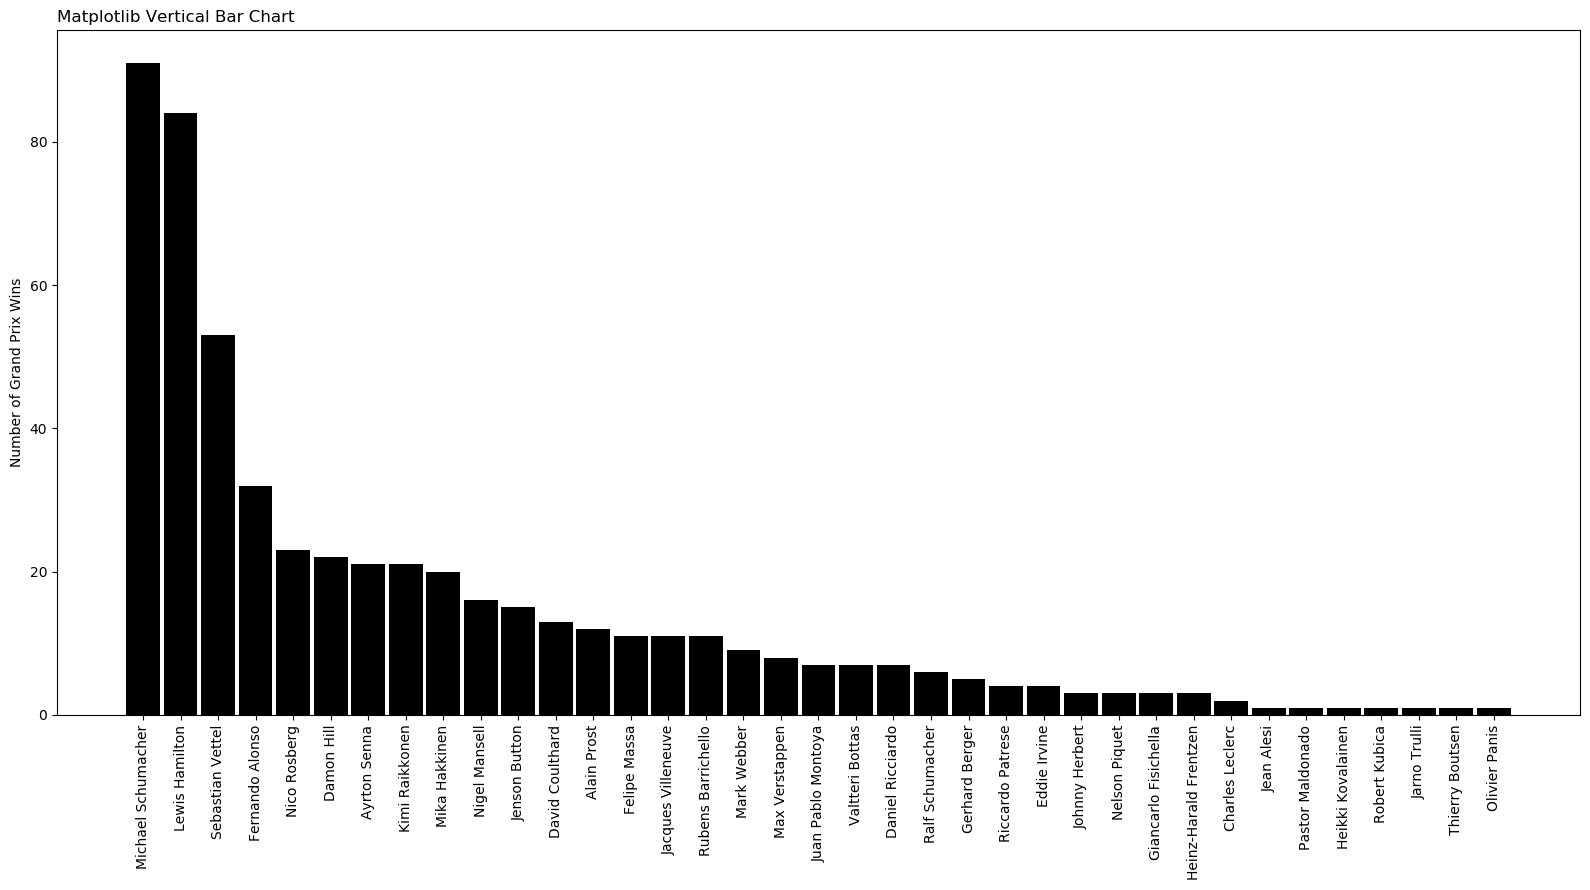

In [68]:
# Draw a chart
plt.figure(figsize=(16,9), dpi=100)

plt.title(label='Matplotlib Vertical Bar Chart', loc='left')
plt.ylabel('Number of Grand Prix Wins')
plt.xticks(rotation='vertical')

plt.bar(df_bar_desc['Winner'], height=df_bar_desc['Total GP Win Count'], color='black', width=0.9)

#plt.show()

# Automatically adjusts padding which works better when saving image to a file
plt.tight_layout()

plt.savefig('Art004_Python_plt_002a.png')

Horizontal

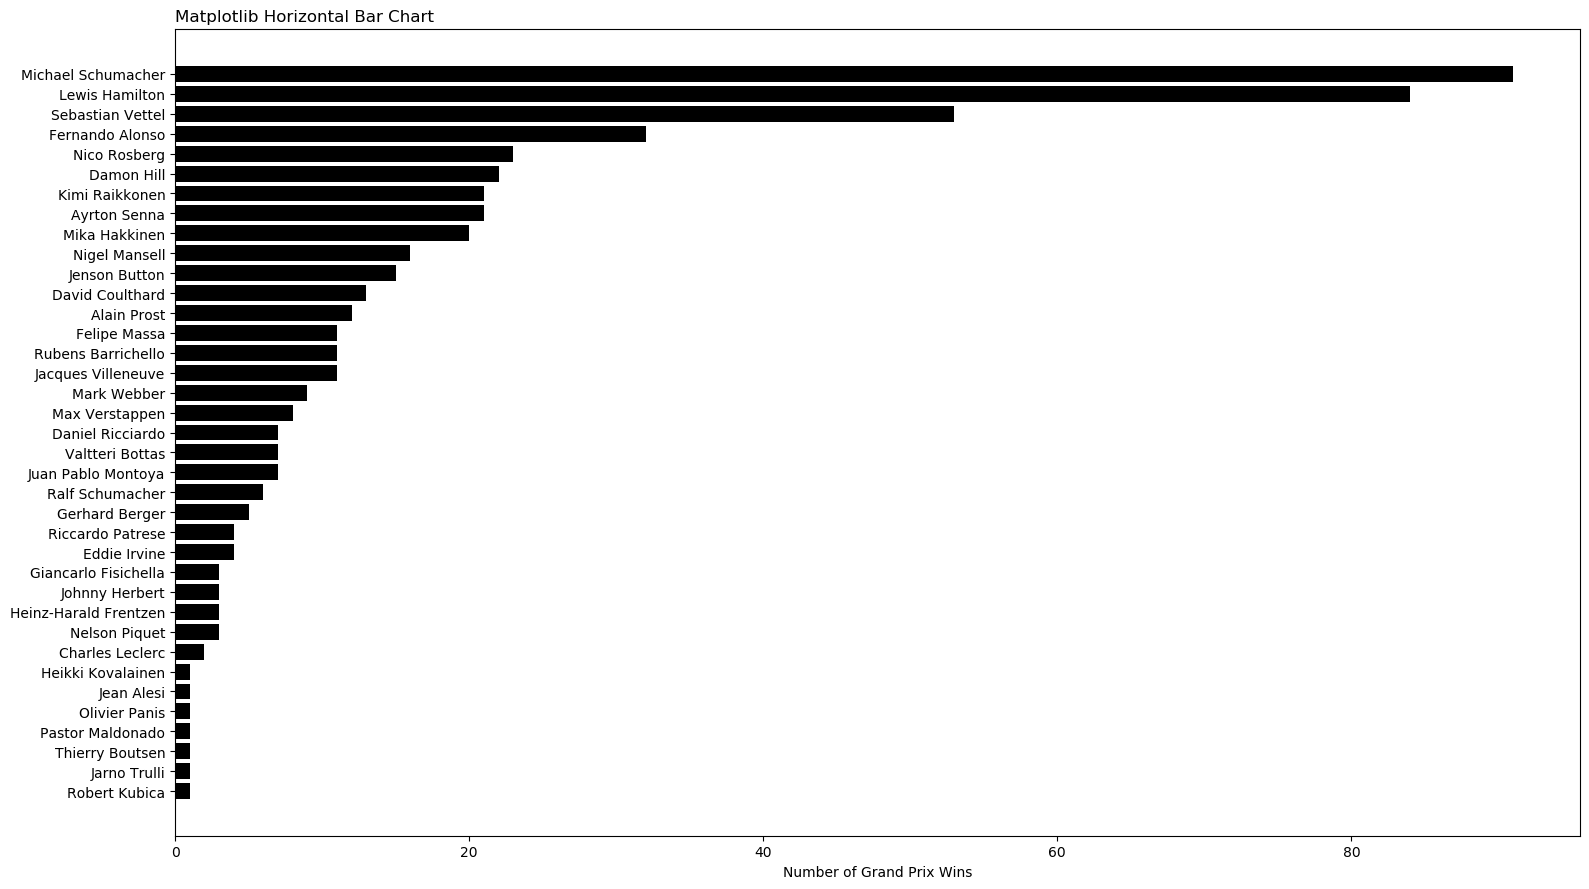

In [67]:
# Draw a chart
plt.figure(figsize=(16,9), dpi=100)

plt.title(label='Matplotlib Horizontal Bar Chart', loc='left')
plt.xlabel('Number of Grand Prix Wins')

plt.barh(df_bar_asc['Winner'], width=df_bar_asc['Total GP Win Count'], color='black', height=0.8)

#plt.show()

# Automatically adjusts padding which works better when saving image to a file
plt.tight_layout()

plt.savefig('Art004_Python_plt_002b.png')

##### Bokeh

Vertical

In [35]:
# Draw a chart
p = figure(title='Bokeh Vertical Bar Chart', x_range=df_bar_desc['Winner'], 
           plot_width=900, plot_height=600,
           y_axis_label='Number of Grand Prix Wins')

p.vbar(x=df_bar_desc['Winner'], bottom=0, top=df_bar_desc['Total GP Win Count'], 
       fill_color='black', line_color='white')

# Rotate axis labels (note, use half of pi to rotate 90 degrees)
p.xaxis.major_label_orientation = 1.57

show(p)

Horizontal

In [36]:
# Draw a chart
p = figure(title='Bokeh Horizontal Bar Chart', y_range=df_bar_asc['Winner'], 
           plot_width=900, plot_height=600, 
           x_axis_label='Number of Grand Prix Wins')

p.hbar(y=df_bar_asc['Winner'], left=0, right=df_bar_asc['Total GP Win Count'], 
       fill_color='black', line_color='white')

show(p)

## 3. Vertical Stacked Bar & Horizontal Stacked Bar

For stacked graphs we will use race winners together with team they drove for. Drivers can change teams from time to time, hence wecan find out how many wins they got while driving for each team. Note, we will utilize Pandas crosstab function to create a matrix which will enable us to plot stacked charts with minimal coding.

##### Put data in desired format 

In [38]:
# Create a crosstab between Race Winner and Team they were driving for at the time.
df_stacked_desc=pd.crosstab(df['Winner'], df['Team'], margins=True).sort_values(by='All', ascending=False)
df_stacked_asc=pd.crosstab(df['Winner'], df['Team'], margins=True).sort_values(by='All', ascending=True)

# Now, that we have sorted our dataframe, drop margins ('All')
df_stacked_desc=df_stacked_desc.drop('All', axis=0)
df_stacked_desc=df_stacked_desc.drop('All', axis=1)
df_stacked_asc=df_stacked_asc.drop('All', axis=0)
df_stacked_asc=df_stacked_asc.drop('All', axis=1)

# Show resulting dataframe
#df_stacked_asc
df_stacked_desc

Team,Benetton,Brawn,Ferrari,Honda,Jordan,Ligier,Lotus,McLaren,Mercedes,Red Bull Racing,Renault,STR,Sauber,Stewart,Williams
Winner,,,,,,,,,,,,,,,
Michael Schumacher,19,0,72,0,0,0,0,0,0,0,0,0,0,0,0
Lewis Hamilton,0,0,0,0,0,0,0,21,63,0,0,0,0,0,0
Sebastian Vettel,0,0,14,0,0,0,0,0,0,38,0,1,0,0,0
Fernando Alonso,0,0,11,0,0,0,0,4,0,0,17,0,0,0,0
Nico Rosberg,0,0,0,0,0,0,0,0,23,0,0,0,0,0,0
Damon Hill,0,0,0,0,1,0,0,0,0,0,0,0,0,0,21
Ayrton Senna,0,0,0,0,0,0,0,21,0,0,0,0,0,0,0
Kimi Raikkonen,0,0,10,0,0,0,2,9,0,0,0,0,0,0,0
Mika Hakkinen,0,0,0,0,0,0,0,20,0,0,0,0,0,0,0


##### Matplotlib

Vertical Stacked

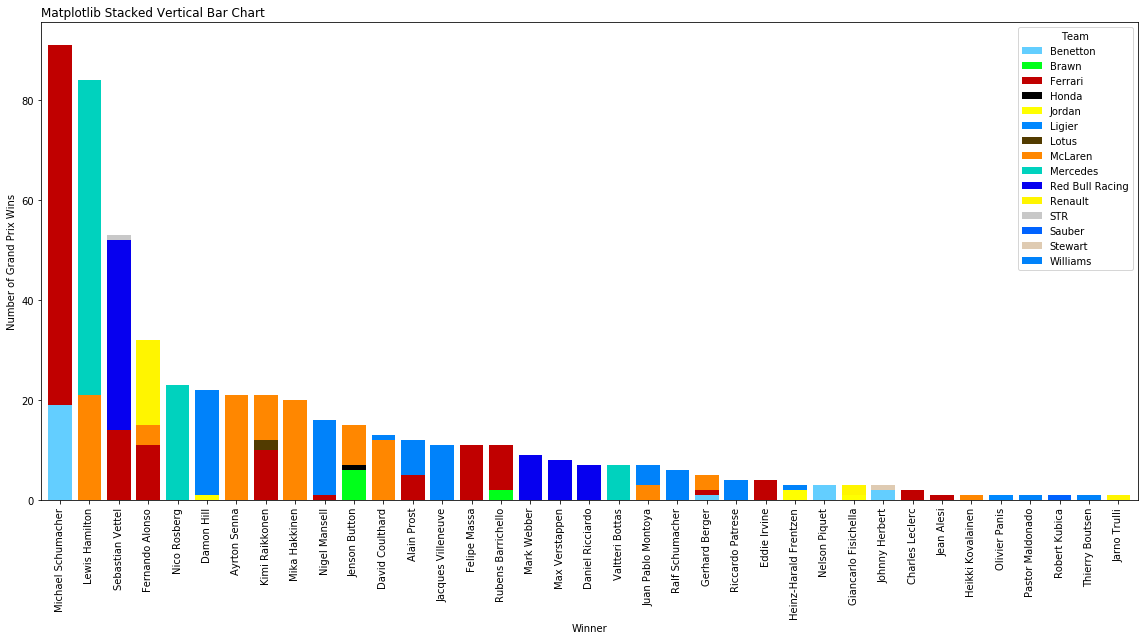

In [66]:
# Set colors for each Team
colors=['#63ceff', '#00ff1a', '#C00000', '#000000', '#ffff00', 
        '#0088ff', '#523b00', '#FF8700', '#00D2BE', '#0600EF', 
        '#FFF500', '#C8C8C8', '#0063FF', '#dfcbb2', '#0082FA']

# Draw a chart
df_stacked_desc.plot.bar(stacked=True, color=colors, figsize=(16,9), width=0.8)
plt.title(label='Matplotlib Stacked Vertical Bar Chart', loc='left')
plt.ylabel('Number of Grand Prix Wins')

#plt.show()

# Automatically adjusts padding which works better when saving image to a file
plt.tight_layout()

plt.savefig('Art004_Python_plt_003a.png')

Horizontal Stacked

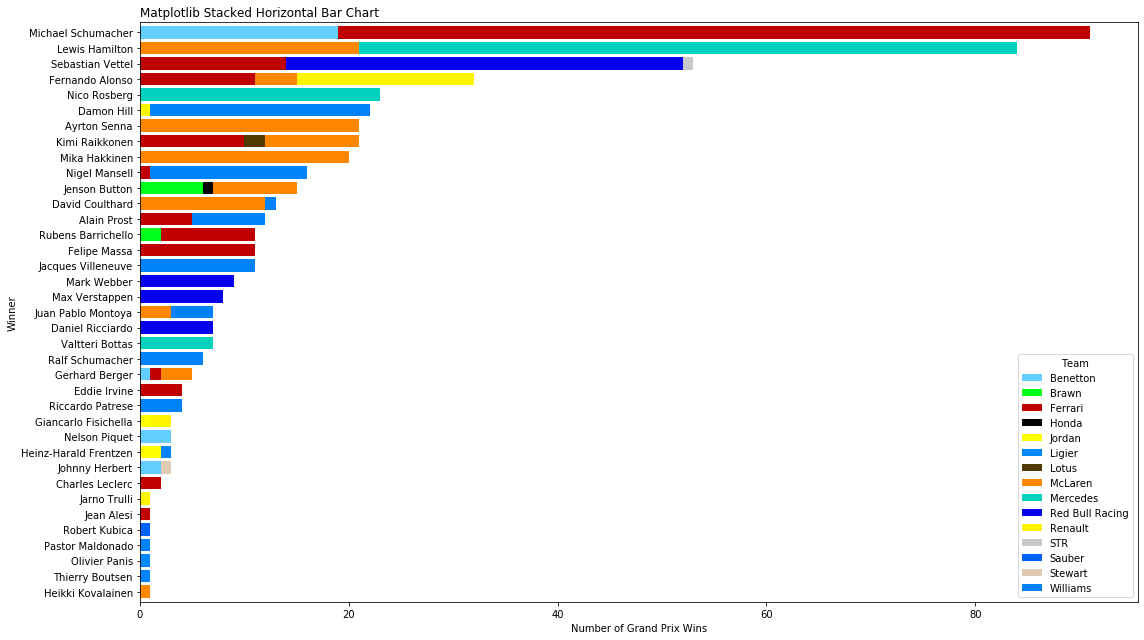

In [65]:
# Set colors for each Team
colors=['#63ceff', '#00ff1a', '#C00000', '#000000', '#ffff00', 
        '#0088ff', '#523b00', '#FF8700', '#00D2BE', '#0600EF', 
        '#FFF500', '#C8C8C8', '#0063FF', '#dfcbb2', '#0082FA']

# Draw a chart
df_stacked_asc.plot.barh(stacked=True, color=colors, figsize=(16,9), width=0.8)
plt.title(label='Matplotlib Stacked Horizontal Bar Chart', loc='left')
plt.xlabel('Number of Grand Prix Wins')

#plt.show()

# Automatically adjusts padding which works better when saving image to a file
plt.tight_layout()

plt.savefig('Art004_Python_plt_003b.png')

##### Bokeh

Vertical Stacked

In [41]:
# Currently Winner is in the index, we need to move it to a column for Bokeh chart
df_stacked_desc_bk=df_stacked_desc.reset_index()

In [42]:
# Set colors for each Team
colors=['#63ceff', '#00ff1a', '#C00000', '#000000', '#ffff00', 
        '#0088ff', '#523b00', '#FF8700', '#00D2BE', '#0600EF', 
        '#FFF500', '#C8C8C8', '#0063FF', '#dfcbb2', '#0082FA']

# Draw a chart
p = figure(title='Bokeh Stacked Vertical Bar Chart', x_range=df_stacked_desc_bk['Winner'], 
           plot_width=800, plot_height=600, toolbar_location=None,
           y_axis_label='Number of Grand Prix Wins')

p.vbar_stack(df_stacked_desc_bk.columns[1:16], x='Winner', source=df_stacked_desc_bk, 
             color=colors, line_color='white', 
             legend_label=list(df_stacked_desc_bk.columns[1:16]))

# Adjust some graph settings
p.xaxis.major_label_orientation = 1.57
p.x_range.range_padding = 0.01
p.y_range.range_padding = 0.01
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
p.outline_line_color = None
p.legend.location = "top_right"

show(p)

Stacked Horizontal

In [43]:
# Currently Winner is in the index, we need to move it to a column for Bokeh chart
df_stacked_asc_bk=df_stacked_asc.reset_index()

In [70]:
# Set colors for each Team
colors=['#63ceff', '#00ff1a', '#C00000', '#000000', '#ffff00', 
        '#0088ff', '#523b00', '#FF8700', '#00D2BE', '#0600EF', 
        '#FFF500', '#C8C8C8', '#0063FF', '#dfcbb2', '#0082FA']

# Draw a chart
p = figure(title='Bokeh Stacked Vertical Bar Chart', y_range=df_stacked_asc_bk['Winner'], 
           plot_width=800, plot_height=600, toolbar_location=None,
           x_axis_label='Number of Grand Prix Wins')

p.hbar_stack(df_stacked_asc_bk.columns[1:16], y='Winner', source=df_stacked_asc_bk, 
             color=colors, line_color='white', 
             legend_label=list(df_stacked_asc_bk.columns[1:16]))

# Adjust some graph settings
p.x_range.range_padding = 0.01
p.y_range.range_padding = 0.01
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
p.outline_line_color = None
p.legend.location = "bottom_right"

show(p)

## 4. Line Charts

For line charts we will select Monaco as one race and will plot the amount of time it took to complete a race within each of the last 30 years. Note, race times can vary significatnly, especially when they are affected by bad weather or major crashes leading to Safety Car periods.

In [45]:
# Create a dataframe with only one track for our line plot
df_line=df.copy()
df_line=df_line[df_line['Grand Prix']=='Monaco']

# Convert Time from object to datetime
df_line['Time']=pd.to_datetime(df_line['Time'], format='%H:%M:%S.%f')

# Create float variable 'Race Time' which we will use to plot our line chart
df_line['Race Time']=df_line['Time'].dt.hour+df_line['Time'].dt.minute/60

# Show resulting dataframe 
df_line

,Grand Prix,Date,Winner First Name,Winner Last Name,Winner Short Name,Car,Team,Laps,Time,Winner,Year,Race Time
3,Monaco,27 May 1990,Ayrton,Senna,SEN,McLaren Honda,McLaren,78,1900-01-01 01:52:46.982,Ayrton Senna,1990,1.866667
19,Monaco,12 May 1991,Ayrton,Senna,SEN,McLaren Honda,McLaren,78,1900-01-01 01:53:02.334,Ayrton Senna,1991,1.883333
37,Monaco,31 May 1992,Ayrton,Senna,SEN,McLaren Honda,McLaren,78,1900-01-01 01:50:59.372,Ayrton Senna,1992,1.833333
53,Monaco,23 May 1993,Ayrton,Senna,SEN,McLaren Ford,McLaren,78,1900-01-01 01:52:10.947,Ayrton Senna,1993,1.866667
67,Monaco,15 May 1994,Michael,Schumacher,MSC,Benetton Ford,Benetton,78,1900-01-01 01:49:55.372,Michael Schumacher,1994,1.816667
84,Monaco,28 May 1995,Michael,Schumacher,MSC,Benetton Renault,Benetton,78,1900-01-01 01:53:11.258,Michael Schumacher,1995,1.883333
102,Monaco,19 May 1996,Olivier,Panis,PAN,Ligier Mugen Honda,Ligier,75,1900-01-01 02:00:45.629,Olivier Panis,1996,2.000000
117,Monaco,11 May 1997,Michael,Schumacher,MSC,Ferrari,Ferrari,62,1900-01-01 02:00:05.654,Michael Schumacher,1997,2.000000
135,Monaco,24 May 1998,Mika,Hakkinen,HAK,McLaren Mercedes,McLaren,78,1900-01-01 01:51:23.595,Mika Hakkinen,1998,1.850000
149,Monaco,16 May 1999,Michael,Schumacher,MSC,Ferrari,Ferrari,78,1900-01-01 01:49:31.812,Michael Schumacher,1999,1.816667


##### Matplotlib

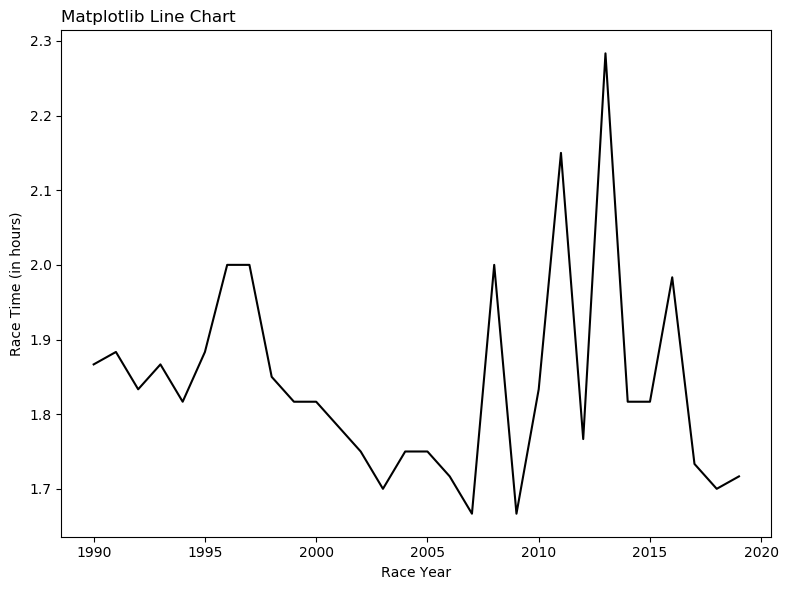

In [47]:
# Draw a chart
fig, ax = plt.subplots(figsize=(8,6), dpi=100)
plt.title(label='Matplotlib Line Chart', loc='left')

ax.plot(df_line['Year'], df_line['Race Time'], color='black')
ax.set(xlabel='Race Year', ylabel='Race Time (in hours)')

#plt.show()

# Automatically adjusts padding which works better when saving image to a file
plt.tight_layout()

plt.savefig('Art004_Python_plt_004.png')

##### Bokeh

In [48]:
# Draw a chart
p = figure(title='Bokeh Line Chart', plot_width=800, plot_height=600, 
           x_axis_label='Race Year', y_axis_label='Race Time (in hours)')

p.line(x=df_line['Year'], y=df_line['Race Time'], color="black", line_width=2)

show(p)

## 5. Area & Area Stacked

For simple area charts we will use the same data that we used for line charts. For stacked area charts we will add an additional race track.

Prepare data for stacked charts

In [49]:
# Create a dataframe with two tracks to be used in our stacked area plot
df_area=df.copy()
df_area=df_area[df_area['Grand Prix'].isin(['Monaco', 'Great Britain'])]

# Convert Time from object to datetime
df_area['Time']=pd.to_datetime(df_area['Time'], format='%H:%M:%S.%f')

# Create float variable 'Race Time' which we will use to plot area chart
df_area['Race Time']=df_area['Time'].dt.hour+df_area['Time'].dt.minute/60
df_area=df_area.sort_values(by=['Grand Prix', 'Year'])

# Show resulting dataframe
df_area

,Grand Prix,Date,Winner First Name,Winner Last Name,Winner Short Name,Car,Team,Laps,Time,Winner,Year,Race Time
7,Great Britain,15 Jul 1990,Alain,Prost,PRO,Ferrari,Ferrari,64,1900-01-01 01:18:30.999,Alain Prost,1990,1.300000
23,Great Britain,14 Jul 1991,Nigel,Mansell,MAN,Williams Renault,Williams,59,1900-01-01 01:27:35.479,Nigel Mansell,1991,1.450000
40,Great Britain,12 Jul 1992,Nigel,Mansell,MAN,Williams Renault,Williams,59,1900-01-01 01:25:42.991,Nigel Mansell,1992,1.416667
56,Great Britain,11 Jul 1993,Alain,Prost,PRO,Williams Renault,Williams,59,1900-01-01 01:25:38.189,Alain Prost,1993,1.416667
71,Great Britain,10 Jul 1994,Damon,Hill,HIL,Williams Renault,Williams,60,1900-01-01 01:30:03.640,Damon Hill,1994,1.500000
87,Great Britain,16 Jul 1995,Johnny,Herbert,HER,Benetton Renault,Benetton,61,1900-01-01 01:34:35.093,Johnny Herbert,1995,1.566667
106,Great Britain,14 Jul 1996,Jacques,Villeneuve,VIL,Williams Renault,Williams,61,1900-01-01 01:33:00.874,Jacques Villeneuve,1996,1.550000
121,Great Britain,13 Jul 1997,Jacques,Villeneuve,VIL,Williams Renault,Williams,59,1900-01-01 01:28:01.665,Jacques Villeneuve,1997,1.466667
138,Great Britain,12 Jul 1998,Michael,Schumacher,MSC,Ferrari,Ferrari,60,1900-01-01 01:47:02.450,Michael Schumacher,1998,1.783333
153,Great Britain,11 Jul 1999,David,Coulthard,COU,McLaren Mercedes,McLaren,60,1900-01-01 01:32:30.144,David Coulthard,1999,1.533333


##### Matplotlib

Area

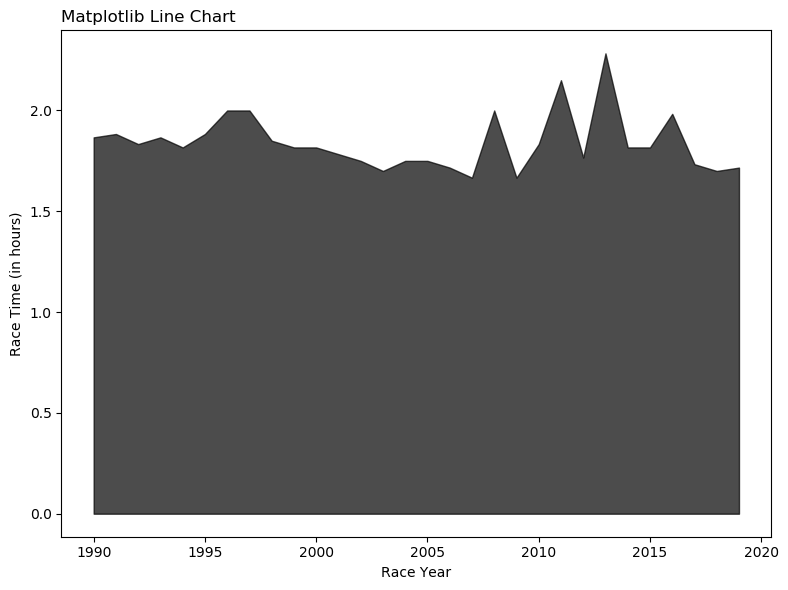

In [50]:
# Draw a chart
fig, ax = plt.subplots(figsize=(8,6), dpi=100)
plt.title(label='Matplotlib Line Chart', loc='left')

ax.fill_between(df_line['Year'], df_line['Race Time'], color="black", alpha=0.7)
ax.set(xlabel='Race Year', ylabel='Race Time (in hours)')

#plt.show()

# Automatically adjusts padding which works better when saving image to a file
plt.tight_layout()

plt.savefig('Art004_Python_plt_005a.png')

Area Stacked

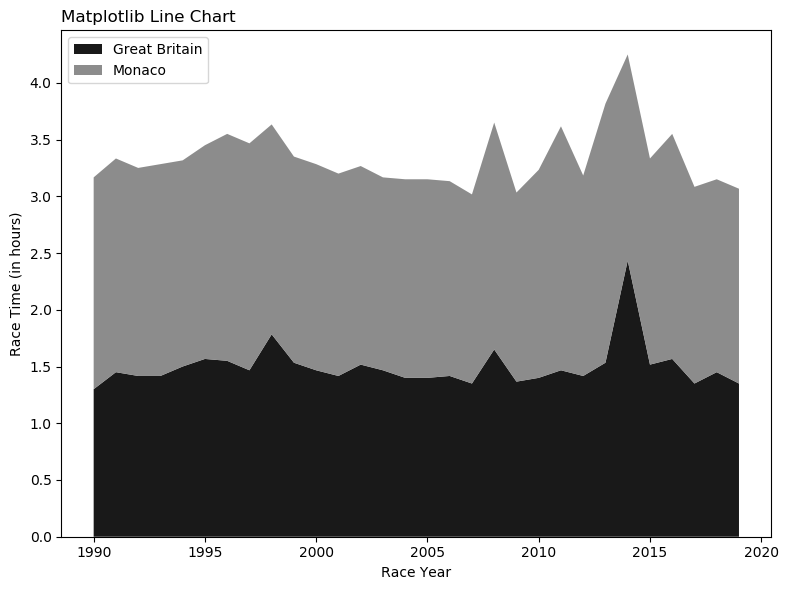

In [51]:
# Split dataframe into two, each containing results for one race track
df_Monaco=df_area[df_area['Grand Prix']=='Monaco']
df_GB=df_area[df_area['Grand Prix']=='Great Britain']

# Draw a chart
fig, ax = plt.subplots(figsize=(8,6), dpi=100)
plt.title(label='Matplotlib Line Chart', loc='left')

ax.stackplot(df_Monaco['Year'], [df_GB['Race Time'], df_Monaco['Race Time']], 
             colors=['black', 'grey'], alpha=0.9,
             labels=['Great Britain','Monaco'])
ax.set(xlabel='Race Year', ylabel='Race Time (in hours)')

# Adjust legent location
plt.legend(loc='upper left')

#plt.show()

# Automatically adjusts padding which works better when saving image to a file
plt.tight_layout()

plt.savefig('Art004_Python_plt_005b.png')

##### Bokeh

Area

In [52]:
# Draw a chart 
p = figure(title='Bokeh Area Chart', plot_width=800, plot_height=600, 
           x_axis_label='Race Year', y_axis_label='Race Time (in hours)')
p.varea(x=df_line['Year'], y1=df_line['Race Time'], y2=0, color="black", alpha=0.8)

show(p)

Area Stacked

In [53]:
# Split dataframe into two, each containing results for one race track
df_Monaco=df_area[df_area['Grand Prix']=='Monaco'].rename(columns={'Race Time' : 'Race Time Monaco'})
df_GB=df_area[df_area['Grand Prix']=='Great Britain'].rename(columns={'Race Time' : 'Race Time GB'})

# Then we need to recombine the dataframes so we have Great Britain and Monaco results in different columns
df_bokeh_area_stack=pd.merge(df_GB, df_Monaco, on='Year', how='left')

# Plot stacked area chart
p = figure(title='Bokeh Stacked Area Chart', plot_width=800, plot_height=600, 
           x_axis_label='Race Year', y_axis_label='Race Time (in hours)')

p.varea_stack(['Race Time GB', 'Race Time Monaco'], x='Year', source=df_bokeh_area_stack,
              color=['black', 'gray'], alpha=0.8,
              legend_label=['Great Britain', 'Monaco'])

# Ajust legend location
p.legend.location = "top_left"

show(p)

## 6. Pie and Donut

For Pie and Donut plots, we will use the top 5 drivers with most wins and group the rest in 'Others'

##### Prepare data for pie and donut

In [54]:
# Create a new column that contains names of top five drivers and 'Other Drivers' for the rest
df_pie=df.copy()
df_pie['Winners']=df['Winner'].apply(lambda x: 
                                     'Michael Schumacher' if x=='Michael Schumacher' else
                                     'Lewis Hamilton' if x=='Lewis Hamilton' else
                                     'Sebastian Vettel' if x=='Sebastian Vettel' else
                                     'Fernando Alonso' if x=='Fernando Alonso' else
                                     'Nico Rosberg' if x=='Nico Rosberg' else 'Other Drivers')

# Keep only two columns
df_pie=df_pie.loc[:, ['Winners', 'Grand Prix']]

# Groyp by Race Winners
df_pie_agg=df_pie.groupby(['Winners'], as_index=False).count()
df_pie_agg=df_pie_agg.rename(columns={'Grand Prix': 'Total GP Win Count'}).sort_values(by='Total GP Win Count', ascending=False).reset_index(drop=True)

# Show resulting dataframe
df_pie_agg                    

,Winners,Total GP Win Count
0,Other Drivers,251
1,Michael Schumacher,91
2,Lewis Hamilton,84
3,Sebastian Vettel,53
4,Fernando Alonso,32
5,Nico Rosberg,23


##### Matplotlib

Pie Chart

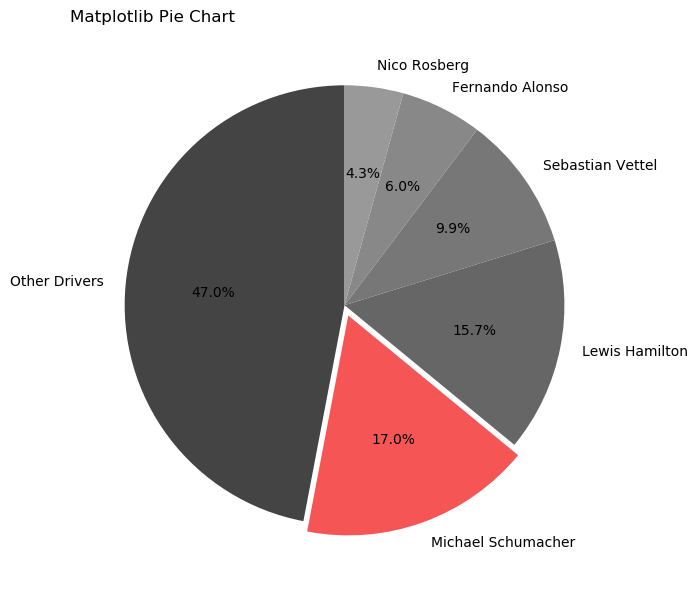

In [55]:
# Draw a chart
explode = (0, 0.05, 0, 0, 0, 0) # only "explode" the 2nd slice
fig, ax = plt.subplots(figsize=(8,6), dpi=100)
plt.title(label='Matplotlib Pie Chart', loc='left')

ax.pie(df_pie_agg['Total GP Win Count'], explode=explode, 
       labels=df_pie_agg['Winners'], autopct='%1.1f%%',
       shadow=False, startangle=90,
       colors=['#444444', '#F55555', '#666666', '#777777', '#888888', '#999999'])

#plt.show()

# Automatically adjusts padding which works better when saving image to a file
plt.tight_layout()

plt.savefig('Art004_Python_plt_006a.png')

Donut Chart

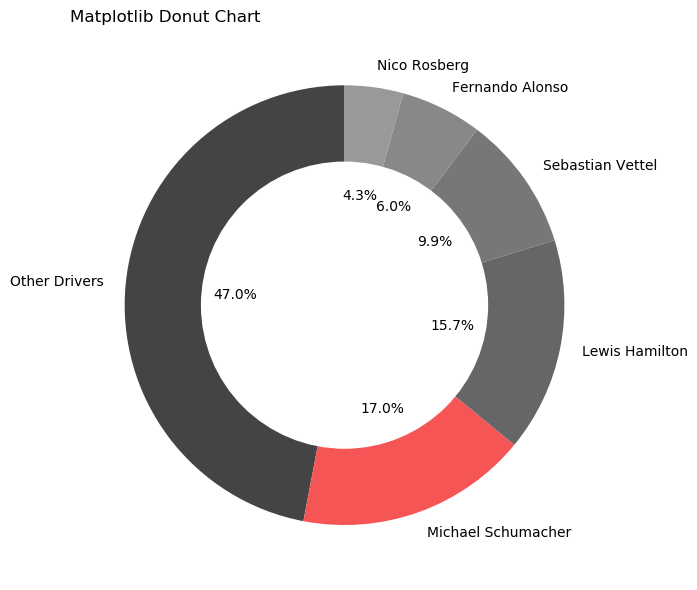

In [56]:
# Draw a chart
fig, ax = plt.subplots(figsize=(8,6), dpi=100)
plt.title(label='Matplotlib Donut Chart', loc='left')

ax.pie(df_pie_agg['Total GP Win Count'], 
       #explode=explode, 
       labels=df_pie_agg['Winners'], autopct='%1.1f%%', pctdistance=0.5,
       shadow=False, startangle=90,
       colors=['#444444', '#F55555', '#666666', '#777777', '#888888', '#999999'])

# Create a white circle for the the center
my_circle=plt.Circle((0,0), 0.65, color='white')
# Get current figure
p=plt.gcf()
# Apply circle on current figure
p.gca().add_artist(my_circle)

#plt.show()

# Automatically adjusts padding which works better when saving image to a file
plt.tight_layout()

plt.savefig('Art004_Python_plt_006b.png')

##### Bokeh

First we need to add a couple of new columns to our dataframe

In [57]:
# Add angles based on Win Count so each wedge is the right size
df_pie_agg['Angle'] = df_pie_agg['Total GP Win Count']/df_pie_agg['Total GP Win Count'].sum() * 2*pi

# Create a column containing color values we want to use
df_pie_agg['Color'] = ['#444444', '#F55555', '#666666', '#777777', '#888888', '#999999']

# Show resulting dataframe
df_pie_agg

,Winners,Total GP Win Count,Angle,Color
0,Other Drivers,251,2.953332,#444444
1,Michael Schumacher,91,1.070730,#F55555
2,Lewis Hamilton,84,0.988366,#666666
3,Sebastian Vettel,53,0.623612,#777777
4,Fernando Alonso,32,0.376520,#888888
5,Nico Rosberg,23,0.270624,#999999


Pie Chart

In [58]:
# Draw a chart
p = figure(title='Bokeh Pie Chart', x_range=(-0.5, 1.0),
           plot_width=800, plot_height=600, 
           toolbar_location=None, tooltips="@Winners: @{Total GP Win Count}") 

p.wedge(x=0.1, y=1, radius=0.4,
        start_angle=cumsum('Angle', include_zero=True), 
        end_angle=cumsum('Angle'),
        line_color="white", 
        fill_color='Color', 
        legend_field='Winners', 
        source=df_pie_agg)

# These options can be used to make the chart cleaner
#p.axis.axis_label=None
#p.axis.visible=False
#p.grid.grid_line_color = None
#p.outline_line_color = None

show(p)

Bokeh Donut Chart

In [59]:
# Draw a chart
p = figure(title='Bokeh Donut Chart', x_range=(-0.5, 1.0),
           plot_width=800, plot_height=600, 
           toolbar_location=None, tooltips="@Winners: @{Total GP Win Count}") 

p.annular_wedge(x=0.1, y=1, inner_radius=0.2, outer_radius=0.4,
        start_angle=cumsum('Angle', include_zero=True), 
        end_angle=cumsum('Angle'),
        line_color="white", 
        fill_color='Color', 
        legend_field='Winners', 
        source=df_pie_agg)

# These option can be used to make grid cleaner
#p.axis.axis_label=None
#p.axis.visible=False
#p.grid.grid_line_color = None
#p.outline_line_color = None

show(p)

## 7. Scatter & Scatter Bubble

For scatter plots we will use Laps field and Time to complete a race for 2019 season. Due to difference in track length their may not be much correlation between the two metrics but this is for illustration purposes only. Note, we will first need to convert Time field to float as we did for line charts

In [60]:
# Create a dataframe with one season to be used in our scatter plot
df_scatter=df.copy()
df_scatter=df_scatter[df_scatter['Year']==2019].reset_index(drop=True)

# Convert Time from object to datetime
df_scatter['Time']=pd.to_datetime(df_scatter['Time'], format='%H:%M:%S.%f')

# Create float variable 'Race Time'
df_scatter['Race Time']=df_scatter['Time'].dt.hour+df_scatter['Time'].dt.minute/60

# Add color column based on the winning team
df_scatter['Color']=df_scatter['Team'].apply(lambda x: 
                                             '#00D2BE' if x=='Mercedes' else
                                             '#C00000' if x=='Ferrari' else
                                             '#0600EF' if x=='Red Bull Racing' else '#000000')

# Add another column to be used for bubble size in the bubble chart
df_scatter['Size']=df_scatter['Team'].apply(lambda x: 
                                             400 if x=='Mercedes' else
                                             200 if x=='Ferrari' else
                                             100 if x=='Red Bull Racing' else 10)
# Need to scale the size down for bokeh chart
df_scatter['Bokeh Size']=df_scatter['Size']/400

# Show resulting dataframe
df_scatter

,Grand Prix,Date,Winner First Name,Winner Last Name,Winner Short Name,Car,Team,Laps,Time,Winner,Year,Race Time,Color,Size,Bokeh Size
0,Australia,17 Mar 2019,Valtteri,Bottas,BOT,Mercedes,Mercedes,58,1900-01-01 01:25:27.325,Valtteri Bottas,2019,1.416667,#00D2BE,400,1.00
1,Bahrain,31 Mar 2019,Lewis,Hamilton,HAM,Mercedes,Mercedes,57,1900-01-01 01:34:21.295,Lewis Hamilton,2019,1.566667,#00D2BE,400,1.00
2,China,14 Apr 2019,Lewis,Hamilton,HAM,Mercedes,Mercedes,56,1900-01-01 01:32:06.350,Lewis Hamilton,2019,1.533333,#00D2BE,400,1.00
3,Azerbaijan,28 Apr 2019,Valtteri,Bottas,BOT,Mercedes,Mercedes,51,1900-01-01 01:31:52.942,Valtteri Bottas,2019,1.516667,#00D2BE,400,1.00
4,Spain,12 May 2019,Lewis,Hamilton,HAM,Mercedes,Mercedes,66,1900-01-01 01:35:50.443,Lewis Hamilton,2019,1.583333,#00D2BE,400,1.00
5,Monaco,26 May 2019,Lewis,Hamilton,HAM,Mercedes,Mercedes,78,1900-01-01 01:43:28.437,Lewis Hamilton,2019,1.716667,#00D2BE,400,1.00
6,Canada,09 Jun 2019,Lewis,Hamilton,HAM,Mercedes,Mercedes,70,1900-01-01 01:29:07.084,Lewis Hamilton,2019,1.483333,#00D2BE,400,1.00
7,France,23 Jun 2019,Lewis,Hamilton,HAM,Mercedes,Mercedes,53,1900-01-01 01:24:31.198,Lewis Hamilton,2019,1.400000,#00D2BE,400,1.00
8,Austria,30 Jun 2019,Max,Verstappen,VER,Red Bull Racing Honda,Red Bull Racing,71,1900-01-01 01:22:01.822,Max Verstappen,2019,1.366667,#0600EF,100,0.25
9,Great Britain,14 Jul 2019,Lewis,Hamilton,HAM,Mercedes,Mercedes,52,1900-01-01 01:21:08.452,Lewis Hamilton,2019,1.350000,#00D2BE,400,1.00


##### Matplotlib

Scatter plot

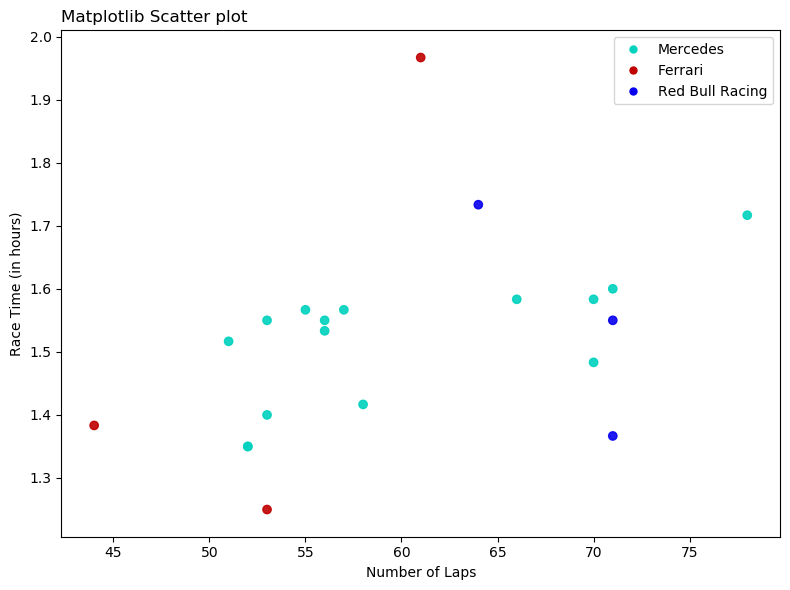

In [73]:
# Draw a chart
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

plt.title(label='Matplotlib Scatter plot', loc='left')
plt.xlabel('Number of Laps')
plt.ylabel('Race Time (in hours)')

ax.scatter(x=df_scatter['Laps'], y=df_scatter['Race Time'], 
            color=df_scatter['Color'], alpha=0.9)

# Create legend elements
MER, = plt.plot([], "o", color='#00D2BE', markersize=5, label='Mercedes')
FER, = plt.plot([], "o", color='#C00000', markersize=5, label='Ferrari')
RBR, = plt.plot([], "o", color='#0600EF', markersize=5, label='Red Bull Racing')
plt.legend(handles=[MER, FER, RBR])

#plt.show()

# Automatically adjusts padding which works better when saving image to a file
plt.tight_layout()

plt.savefig('Art004_Python_plt_007a.png')

Buuble chart

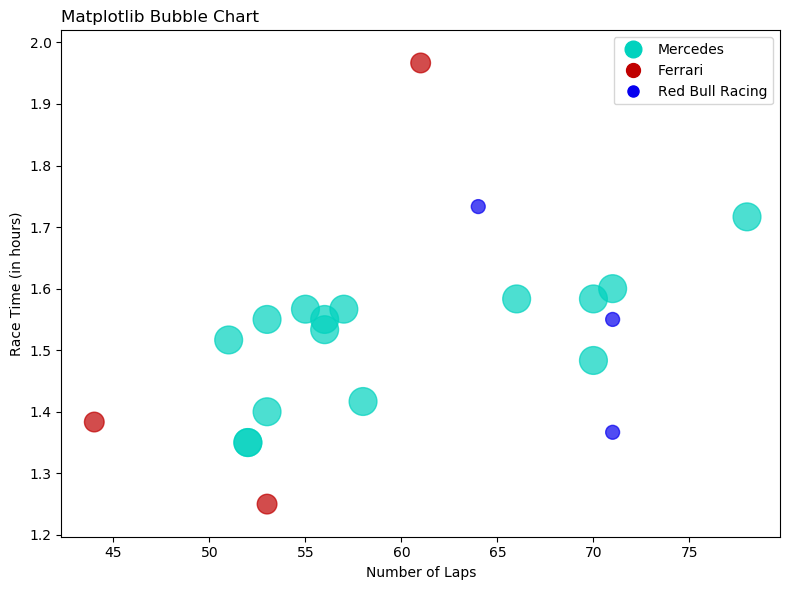

In [74]:
# Draw a chart
plt.figure(figsize=(8,6), dpi=100)
plt.title(label='Matplotlib Bubble Chart', loc='left')
plt.xlabel('Number of Laps')
plt.ylabel('Race Time (in hours)')

# Note, we use size column we have previously created for bubble size
plt.scatter(x=df_scatter['Laps'], y=df_scatter['Race Time'], 
            s=df_scatter['Size'], color=df_scatter['Color'], alpha=0.7)

# Create legend elements
MER, = plt.plot([], "o", color='#00D2BE', markersize=12, label='Mercedes')
FER, = plt.plot([], "o", color='#C00000', markersize=10, label='Ferrari')
RBR, = plt.plot([], "o", color='#0600EF', markersize=8, label='Red Bull Racing')
plt.legend(handles=[MER, FER, RBR])

#plt.show()

# Automatically adjusts padding which works better when saving image to a file
plt.tight_layout()

plt.savefig('Art004_Python_plt_007b.png')

##### Bokeh

Scatter plot

In [75]:
# Draw a chart
p = figure(title='Bokeh Scatter Plot', plot_width=800, plot_height=600, 
           toolbar_location=None,
           tooltips="@Team, Laps: @Laps, Race Time: @{Race Time} hours",
           x_axis_label='Number of Laps', y_axis_label='Race Time (in hours)')

p.scatter(x='Laps', y='Race Time', 
          radius=0.3,
          fill_color='Color', fill_alpha=0.7,
          line_color=None, legend_field='Team',
          source=df_scatter)

show(p)

Bubble Chart

In [76]:
# Draw a chart
p = figure(title='Bokeh Bubble Chart', plot_width=800, plot_height=600, 
           toolbar_location=None,
           tooltips="@Team, Laps: @Laps, Race Time: @{Race Time} hours",
           x_axis_label='Number of Laps', y_axis_label='Race Time (in hours)')

p.scatter(x='Laps', y='Race Time', 
          radius='Bokeh Size',
          fill_color='Color', fill_alpha=0.7,
          line_color=None, legend_field='Team',
          source=df_scatter)

show(p)

# End of Code